<a href="https://colab.research.google.com/github/ciphaerx/Assignment/blob/main/Emerging_Technology_(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING**

**1. Upload the CSV zip file**

In [ ]:
from google.colab import files

# Upload the CSV file (expect user interaction)
uploaded = files.upload()  # Outputs a file selection dialog


Saving archive.zip to archive.zip


**2. Verify the Uploaded File**

In [ ]:
# List the uploaded files to verify the filename
uploaded.keys()  # Outputs a dictionary with the uploaded file names


dict_keys(['archive.zip'])

**3. Unzip the File**

In [ ]:
import zipfile
import os

# Extract the zip file
zip_file = 'archive.zip'

# Extract the zip file and place the contents into the current directory
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()

# List the files to verify extraction
os.listdir()  # Outputs the list of files extracted from the zip


['.config',
 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'archive.zip',
 'sample_data']

**4. Load the CSV file into a DataFrame**

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_filename = 'Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
df = pd.read_csv(csv_filename)

# Show the first few rows to verify the data load
df.head()  # Outputs the first few rows of the DataFrame


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


**5. Data Cleaning**

a. Strip Leading and Trailing Whitespace from Column Names

In [ ]:
# Strip leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Display cleaned column names
df.columns  # Outputs the cleaned column names to verify the operation


Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

b. Check for Missing Values

In [ ]:
# Check for missing values in the dataset
df.isnull().sum()  # Outputs the count of missing values for each column


,0
Flow ID,0
Source IP,0
Source Port,0
Destination IP,0
Destination Port,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


c. Handle Missing Values in Numeric Columns and the 'Label' Column

In [ ]:
# Fill missing values for numeric columns with the mean value
df.fillna(df.mean(numeric_only=True), inplace=True)

# Drop rows where 'Label' has missing values
df.dropna(subset=['Label'], inplace=True)

# Display the first few rows of the cleaned dataset to verify changes
df.head()  # Outputs the first few rows after handling missing values


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


**6. Data Preprocessing**

a.  Normalize the Numerical Columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Handle infinity values and replace them with NaN, then fill with the mean
df[numerical_cols] = df[numerical_cols].replace([np.inf, -np.inf], np.nan)
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Normalize the numerical columns using MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Show the first few rows to verify normalization
df[numerical_cols].head()  # Outputs the first few rows of the normalized numerical columns


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.006760,0.837225,0.352941,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001221,0.840109,0.352941,9.166671e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001221,0.840124,0.352941,4.416669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006760,0.705548,0.352941,2.916668e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,...,0.000000,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.006760,0.837194,0.352941,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,...,0.000518,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


b. Categorical Encoding of Non-Numerical Columns

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Handle missing values in categorical columns by filling them with 'Missing'
df[categorical_cols] = df[categorical_cols].fillna('Missing')

# Limit categories by keeping only the top 10 most frequent ones, replacing the others with 'Other'
for col in categorical_cols:
    top_categories = df[col].value_counts().index[:10]
    df[col] = df[col].apply(lambda x: x if x in top_categories else 'Other')

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded data
df_encoded.head()  # Outputs the first few rows of the DataFrame after one-hot encoding


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Timestamp_7/7/2017 3:59,Timestamp_7/7/2017 4:00,Timestamp_7/7/2017 4:01,Timestamp_7/7/2017 4:09,Timestamp_7/7/2017 4:11,Timestamp_7/7/2017 4:13,Timestamp_7/7/2017 4:14,Timestamp_7/7/2017 4:15,Timestamp_Other,Label_DDoS
0,0.006760,0.837225,0.352941,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,...,False,False,False,False,False,False,False,False,True,False
1,0.001221,0.840109,0.352941,9.166671e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,...,False,False,False,False,False,False,False,False,True,False
2,0.001221,0.840124,0.352941,4.416669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,...,False,False,False,False,False,False,False,False,True,False
3,0.006760,0.705548,0.352941,2.916668e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,...,False,False,False,False,False,False,False,False,True,False
4,0.006760,0.837194,0.352941,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,...,False,False,False,False,False,False,False,False,True,False


**7. Data Visualization**

a. Bar Plot: Distribution of Security Events (Normal vs. DDoS)

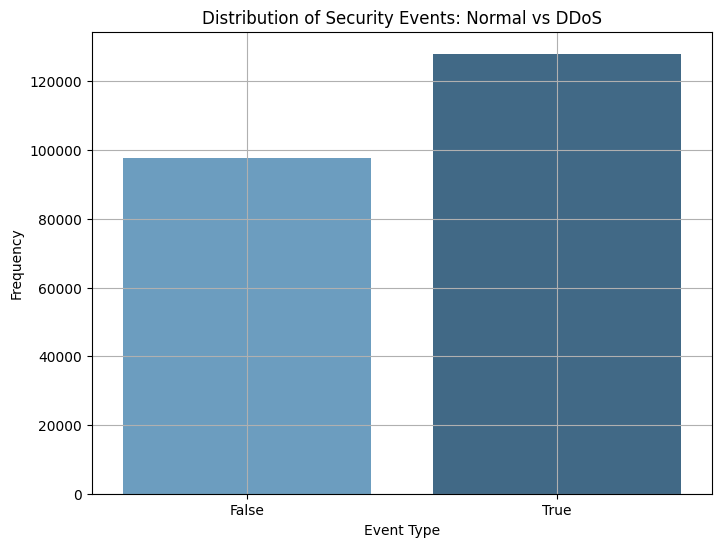

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each label (Normal, DDoS)
label_counts = df_encoded['Label_DDoS'].value_counts()

# Create a bar plot for the distribution of Normal vs DDoS traffic
plt.figure(figsize=(8,6))

# Use 'hue' to assign the color palette correctly
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, palette='Blues_d', dodge=False)

# Add plot titles and labels
plt.title('Distribution of Security Events: Normal vs DDoS')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Remove the legend since it's redundant in this case
plt.legend([],[], frameon=False)

# Add gridlines
plt.grid(True)

# Show the plot
plt.show()


b.  Line Plot: Event Trends Over Time (Hourly)

Extract Timestamps and Convert to Series:

In [ ]:
import re
import pandas as pd

# Extract the timestamp portion from column names that contain "Timestamp"
# Use regex to capture the timestamp information
timestamp_columns = df_encoded.columns[df_encoded.columns.str.contains('Timestamp')]

# Clean the 'Timestamp_' prefix from the column names and convert to datetime
timestamps = pd.Series(pd.to_datetime([re.sub('Timestamp_', '', col) for col in timestamp_columns], errors='coerce'))

# Preview the extracted timestamps
timestamps.head()  # Now this will work, outputs the first few timestamps


,0
0,2017-07-07 03:58:00
1,2017-07-07 03:59:00
2,2017-07-07 04:00:00
3,2017-07-07 04:01:00
4,2017-07-07 04:09:00


Extract Hour from the Timestamps:

In [ ]:
# Extract the hour from the timestamps
df_encoded['Hour'] = timestamps.dt.hour

# Preview the DataFrame with the new 'Hour' column
df_encoded[['Hour']].head()  # Outputs the first few rows of the DataFrame with the 'Hour' column


,Hour
0,3.0
1,3.0
2,4.0
3,4.0
4,4.0


Line Plot: Visualize Event Trends Over Time (by Hour):

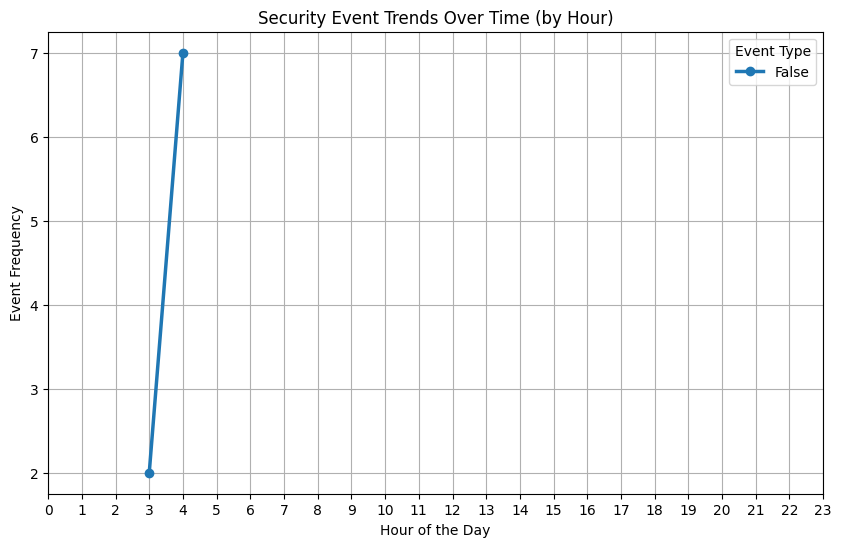

In [ ]:
# Group data by hour and count the occurrences of each label (DDoS vs Normal)
event_trends = df_encoded.groupby(['Hour', 'Label_DDoS']).size().unstack(fill_value=0)

# Plot line graph of security events over time (by hour)
plt.figure(figsize=(10,6))
event_trends.plot(kind='line', linewidth=2.5, marker='o', ax=plt.gca())
plt.title('Security Event Trends Over Time (by Hour)')
plt.xlabel('Hour of the Day')
plt.ylabel('Event Frequency')
plt.xticks(range(0, 24, 1))  # Show every hour
plt.grid(True)
plt.legend(title="Event Type")
plt.show()


c. Histograms: Distribution of Forward and Backward Packet Rates

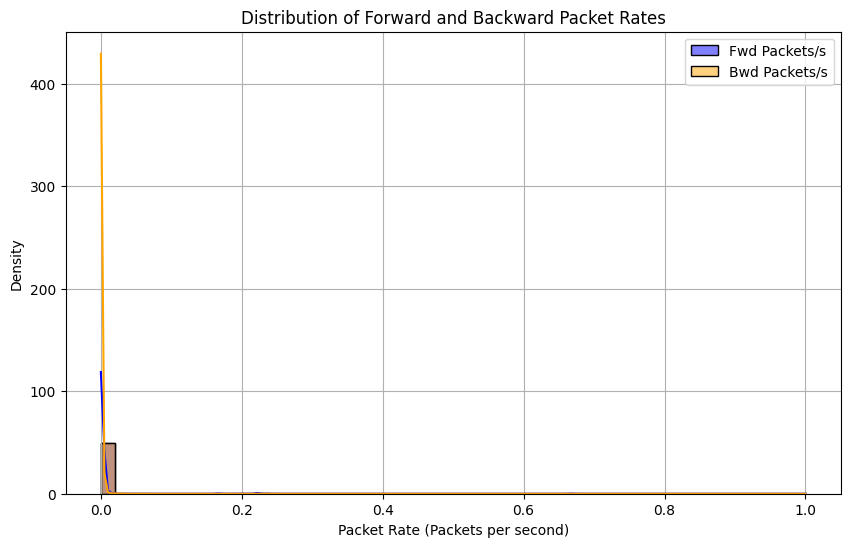

In [ ]:
# Plot the distribution of Forward and Backward Packet Rates
plt.figure(figsize=(10,6))

# Forward Packets per second
sns.histplot(df_encoded['Fwd Packets/s'], bins=50, color='blue', kde=True, label='Fwd Packets/s', stat='density')

# Backward Packets per second
sns.histplot(df_encoded['Bwd Packets/s'], bins=50, color='orange', kde=True, label='Bwd Packets/s', stat='density')

plt.title('Distribution of Forward and Backward Packet Rates')
plt.xlabel('Packet Rate (Packets per second)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


d. Correlation Matrix of Features

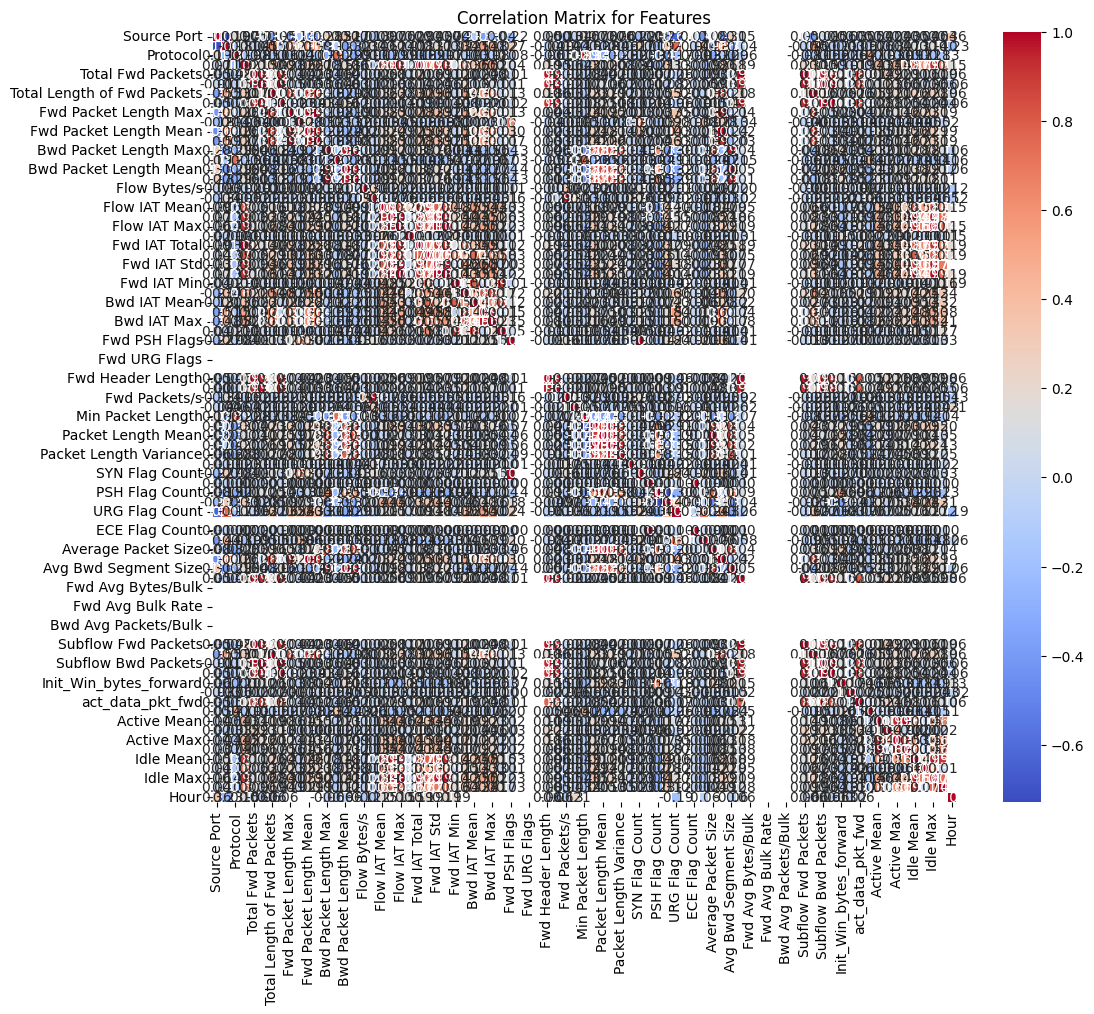

In [ ]:
# Compute the correlation matrix for numerical columns
correlation_matrix = df_encoded.select_dtypes(include=[np.number]).corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Features')
plt.show()


**8. Feature Engineering**

In [ ]:
# Feature engineering: Create a new feature 'Total Packet Count'
df_encoded['Total Packet Count'] = df_encoded['Fwd Packets/s'] + df_encoded['Bwd Packets/s']

# Display the first few rows of the data to verify the new feature
df_encoded.head()  # Outputs the DataFrame with the new 'Total Packet Count' column


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Timestamp_7/7/2017 4:01,Timestamp_7/7/2017 4:09,Timestamp_7/7/2017 4:11,Timestamp_7/7/2017 4:13,Timestamp_7/7/2017 4:14,Timestamp_7/7/2017 4:15,Timestamp_Other,Label_DDoS,Hour,Total Packet Count
0,0.006760,0.837225,0.352941,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,...,False,False,False,False,False,False,True,False,3.0,0.222222
1,0.001221,0.840109,0.352941,9.166671e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,...,False,False,False,False,False,False,True,False,3.0,0.007645
2,0.001221,0.840124,0.352941,4.416669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,...,False,False,False,False,False,False,True,False,4.0,0.016026
3,0.006760,0.705548,0.352941,2.916668e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,...,False,False,False,False,False,False,True,False,4.0,0.024510
4,0.006760,0.837194,0.352941,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,...,False,False,False,False,False,False,True,False,4.0,0.222222


**9. Model Selection**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Initialize Logistic Regression and Decision Tree models
log_reg_model = LogisticRegression(max_iter=1000)
decision_tree_model = DecisionTreeClassifier()


**10. Model Training**

a. Split the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and the target variable (y)
X = df_encoded.drop('Label_DDoS', axis=1)
y = df_encoded['Label_DDoS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show the dimensions of the training and testing sets to verify the split
X_train_scaled.shape, X_test_scaled.shape  # Outputs the shape of the training and testing sets


((180596, 122), (45149, 122))

b. Train the Models

(Train the Decision Tree Model)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
decision_tree_model.fit(X_train_scaled, y_train)

# Display confirmation of the training completion
decision_tree_model


DecisionTreeClassifier(random_state=42)

**11. Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict using the Decision Tree Classifier
y_pred_tree = decision_tree_model.predict(X_test_scaled)

# Evaluate the Decision Tree Classifier
decision_tree_report = classification_report(y_test, y_pred_tree, target_names=['Normal', 'DDoS'], output_dict=True)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Display the evaluation metrics
decision_tree_report, accuracy_tree


({'Normal': {'precision': 1.0,
   'recall': 0.7062097397577943,
   'f1-score': 0.827811169168504,
   'support': 19405.0},
  'DDoS': {'precision': 0.8186993162664971,
   'recall': 1.0,
   'f1-score': 0.9003129972547168,
   'support': 25744.0},
  'accuracy': 0.8737292077343906,
  'macro avg': {'precision': 0.9093496581332485,
   'recall': 0.8531048698788972,
   'f1-score': 0.8640620832116104,
   'support': 45149.0},
  'weighted avg': {'precision': 0.8966221887077167,
   'recall': 0.8737292077343906,
   'f1-score': 0.869151776097815,
   'support': 45149.0}},
 0.8737292077343906)